<a href="https://colab.research.google.com/github/mahu0926/Plan-T/blob/main/PlantNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from keras.preprocessing.image import ImageDataGenerator 
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import tensorflow.keras.layers as tfl

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation

import keras
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential, save_model, load_model
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
import numpy as np
from keras.callbacks import TensorBoard
import time
import matplotlib.pyplot as plt
import datetime
import cv2
import os
import tensorflow as tf
import tensorflow.keras
import cv2
print('tf version', tf.__version__)
print('keras version', tf.keras.__version__)
print('gpu is ','available' if tf.config.list_physical_devices('GPU') else 'not available')

tf version 2.8.0
keras version 2.8.0
gpu is  not available


In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

# New Section

In [ ]:
! kaggle datasets download rashikrahmanpritom/plant-disease-recognition-dataset

100% 1.25G/1.25G [00:12<00:00, 109MB/s] 
100% 1.25G/1.25G [00:12<00:00, 107MB/s]


In [ ]:
! unzip plant-disease-recognition-dataset.zip

Archive:  plant-disease-recognition-dataset.zip
  inflating: Test/Test/Healthy/8ddaa5a5caa5caa8.jpg  
  inflating: Test/Test/Healthy/8ddaac1bd6c8cd0a.jpg  
  inflating: Test/Test/Healthy/8ddd5ec1c0de38c4.jpg  
  inflating: Test/Test/Healthy/8def3f60308ab41b.jpg  
  inflating: Test/Test/Healthy/8def4d91382175c3.jpg  
  inflating: Test/Test/Healthy/8df452e2e38c0b6e.jpg  
  inflating: Test/Test/Healthy/8dfae9d78cc32089.jpg  
  inflating: Test/Test/Healthy/8e3dbccdfe08c850.jpg  
  inflating: Test/Test/Healthy/8e68163c62dc57d5.jpg  
  inflating: Test/Test/Healthy/8e6a823cce9ff40c.jpg  
  inflating: Test/Test/Healthy/8e77857194a59a87.jpg  
  inflating: Test/Test/Healthy/8e79802b3fb770c8.jpg  
  inflating: Test/Test/Healthy/8e7986d1ecd36445.jpg  
  inflating: Test/Test/Healthy/8e7e70a6878c1c79.jpg  
  inflating: Test/Test/Healthy/8e82b1a51bd11afe.jpg  
  inflating: Test/Test/Healthy/8e8470687be37378.jpg  
  inflating: Test/Test/Healthy/8e858c8397706b7b.jpg  
  inflating: Test/Test/Healthy/8e8

In [ ]:
IMG_SIZE = tuple((256, 256))
nb_train_samples = 1322
nb_validation_samples = 150
nb_eval_samples = 60 
epochs = 10
BATCH_SIZE = 128
num_of_class = 3

In [ ]:
directory = "dataset/"
train_dataset = image_dataset_from_directory("Train/Train/",
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             seed=42)
validation_dataset = image_dataset_from_directory("Test/Test/",
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             seed=42)
eval_dataset = image_dataset_from_directory("Validation/Validation/",
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             seed=42)

Found 1322 files belonging to 3 classes.
Found 150 files belonging to 3 classes.
Found 60 files belonging to 3 classes.


In [ ]:
from PIL import Image
filepath = "Train/Train/Rust/c0b175c783bb6f08.jpg"
img = Image.open(filepath)
print(img.width, img.height)
image_width = int(img.width/4)
image_height = int(img.height/4)

4000 2672


In [ ]:
# converting to image array
#default_image_size = tuple((image_width, image_height))
default_image_size = tuple((256,256))
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [ ]:
# creating image_list and label_list
from keras.preprocessing.image import img_to_array
from os import listdir
#print(os.getcwd())
image_list, label_list = [], []
directory_root = './Train'
root_dir = listdir(directory_root)
for plant_folder in root_dir :
  plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")
  #print(plant_disease_folder_list)
  for plant_disease_folder in plant_disease_folder_list:
    plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")
    #print(plant_disease_image_list)
    for image in plant_disease_image_list[:]:
      image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
      #print(image_directory)
      if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
        image_list.append(convert_image_to_array(image_directory))
        label_list.append(plant_disease_folder)
print("[INFO] Image loading completed")  

[INFO] Image loading completed


In [ ]:
# getting the image size
image_size = len(image_list)
print(image_size)

1322


In [ ]:
# transforming the labels
from sklearn.preprocessing import LabelBinarizer
import pickle
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

In [ ]:
print(label_binarizer.classes_)

['Healthy' 'Powdery' 'Rust']


In [ ]:
np_image_list = np.array(image_list, dtype=np.float16) / 225.0

In [ ]:
len(image_list)

1322

In [ ]:
# splitting data into test and train 
print("[INFO] Spliting data to train, test")
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42) 

[INFO] Spliting data to train, test


In [ ]:
print(y_train)

[[0 1 0]
 [1 0 0]
 [1 0 0]
 ...
 [0 1 0]
 [0 0 1]
 [0 1 0]]


In [ ]:
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

In [ ]:
print(x_train.shape)

(1057, 256, 256, 3)


In [ ]:
from keras.models import Sequential, save_model, load_model
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf


width = 256
height = 256
depth = 3

model = Sequential()
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1

# 

model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
# 

model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 activation_28 (Activation)  (None, 256, 256, 32)      0         
                                                                 
 batch_normalization_24 (Bat  (None, 256, 256, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 85, 85, 32)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 85, 85, 32)        0         
                                                                 
 conv2d_27 (Conv2D)          (None, 85, 85, 64)      

In [ ]:
model.compile(loss ='categorical_crossentropy',
                     optimizer ='rmsprop', 
                   metrics =['accuracy']) 

In [ ]:
BS = 32


history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train)//BS,
    validation_steps = len(x_test)//BS,
    epochs=10,
    )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/10
33/33 [==============================] - 235s 7s/step - loss: 0.2911 - accuracy: 0.9180 - val_loss: 4.5534 - val_accuracy: 0.4792
Epoch 2/10
33/33 [==============================] - 234s 7s/step - loss: 0.2138 - accuracy: 0.9249 - val_loss: 5.5026 - val_accuracy: 0.5509
Epoch 3/10
33/33 [==============================] - 236s 7s/step - loss: 0.2239 - accuracy: 0.9337 - val_loss: 3.5377 - val_accuracy: 0.3208
Epoch 4/10
33/33 [==============================] - 235s 7s/step - loss: 0.1652 - accuracy: 0.9454 - val_loss: 2.1437 - val_accuracy: 0.5698
Epoch 5/10
33/33 [==============================] - 235s 7s/step - loss: 0.2145 - accuracy: 0.9317 - val_loss: 3.7677 - val_accuracy: 0.5321
Epoch 6/10
33/33 [==============================] - 237s 7s/step - loss: 0.1694 - accuracy: 0.9415 - val_loss: 3.7276 - val_accuracy: 0.5698
Epoch 7/10
33/33 [==============================] - 236s 7s/step - loss: 0.1823 - accuracy: 0.9415 - val_loss: 2.0968 - val_accuracy: 0.6755
Epoch 8/10
33

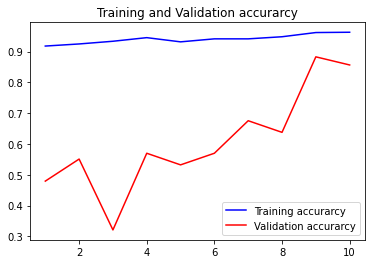

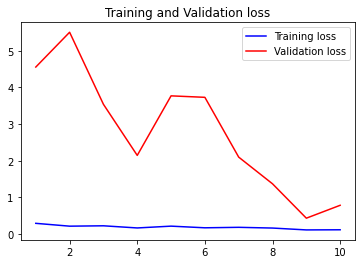

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()


In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
9/9 [==============================] - 13s 1s/step - loss: 0.7833 - accuracy: 0.8566
Test Accuracy: 85.66038012504578
